In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.odr as ODR

# Calibracion

In [4]:
datosCal = pd.read_csv('D:\Downloads\Especiacion Química\Calibracion Especiacion quimica.txt', sep='\t', decimal='.')

#Hacer ajuste lineal en el eje x canal y en el eje y energia
x = datosCal['Canal']
y = datosCal['Energia']

def f(B, x):
    return B[0]*x + B[1]
linear = ODR.Model(f)
mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, linear, beta0=[0., 1.])
myoutput = myodr.run()
#myoutput.pprint()
m = myoutput.beta[0]
b = myoutput.beta[1]

#Funcion para calcular la energia de un canal input
def energia(canal):
    return m*canal + b

# Funciones

In [25]:
energia(1341)

6298.280135750716

In [8]:
#Funcion para buscar maximos (achicar el rango del eje x en el histograma)
energia = datos['Energia']  # reemplaza 'Energia' con el nombre de tu columna de energía
cuentas = datos['Cuentas']  # reemplaza 'Cuentas' con el nombre de tu columna de cuentas


def pathfinder(min, max, pasos=500, div=150):
    
    plt.hist(energia, weights=cuentas, bins=div, color='skyblue', edgecolor='black', density=False)
    plt.xlabel('Energía')
    plt.ylabel('Cuentas')
    #plt.title('Muestra de Tierra')

    plt.xlim(min, max)
    plt.xticks(range(min, max, pasos))
    plt.show()
    
    
# Defino una funcion que me recorte los datos en un rango de energias
def recorte(min, max):
    return datos[(datos['Energia'] > min) & (datos['Energia'] < max)]

# Defino una funcion gausseana para ajustar los picos
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

# Fondo

In [5]:
#Leo los datos de la muestra y del fondo y les creo una nueva columna con la energia
datosT = pd.read_csv('D:\Downloads\Especiacion Química\Tierra_NB_Nuevo.txt', sep='\t')
datosFondo = pd.read_csv('D:\Downloads\Especiacion Química\Fondo_NB_Nuevo.txt', sep='\t')

datosT['Energia'] = energia(datosT['Cuentas'].index)
datosFondo['Energia'] = energia(datosFondo['Cuentas'].index)
#Resto el fondo de la muestra
datos = pd.DataFrame()
datos['Cuentas'] = datosT['Cuentas'] - datosFondo['Cuentas']
datos['Energia'] = energia(datos['Cuentas'].index)

# Datos

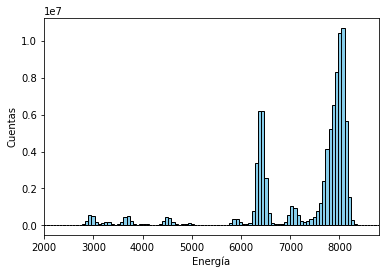

In [33]:
# Supongamos que 'energia' y 'cuentas' son tus datos
energia = datos['Energia']  # reemplaza 'Energia' con el nombre de tu columna de energía
cuentas = datos['Cuentas']  # reemplaza 'Cuentas' con el nombre de tu columna de cuentas

plt.hist(energia, weights=cuentas, bins=150, color='skyblue', edgecolor='black', density=False)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
#plt.title('Muestra de Tierra')

plt.xlim(2000, 8800)
#plt.xticks(range(5500, 6800, 500))
plt.show()


## Pico 1

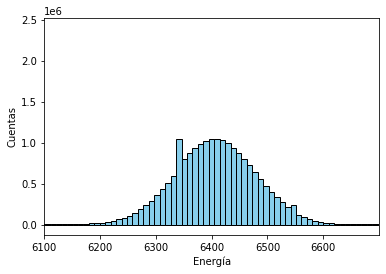

In [9]:
pathfinder(6100, 6700, 100, div=1000)
pico1 = recorte(6100, 6700)

In [10]:
# Ajusto el pico1 usando ODR y la funcion gausseana
x = pico1['Energia']
y = pico1['Cuentas']

def f(B, x):
    return B[0] * np.exp(-(x-B[1])**2 / B[2])

gauss = ODR.Model(f)
mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, gauss, beta0=[1e6, 6400., 1000.], maxit=10000)
myoutput = myodr.run()
#myoutput.pprint()
amp = myoutput.beta[0]
cen = myoutput.beta[1]
err_cen = myoutput.sd_beta[1]
wid = myoutput.beta[2]

amp, cen, wid


(525014.6602961456, 6403.761443479195, 12135.072740880712)

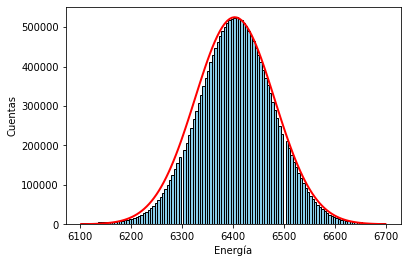

El pico 1 tiene una energia de 6403.761443479195 keV y una altura de  525014.6602961456 cuentas


In [11]:
#Grafico el ajuste
#plt.plot(x, y, 'ko')
plt.hist(pico1['Energia'], weights=pico1['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.plot(x, f([amp, cen, wid], x), color='red', linewidth=2)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
plt.show()

print("El pico 1 tiene una energia de", cen, "keV y una altura de ", amp, "cuentas")

## Pico 2

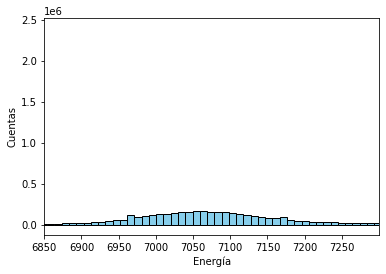

In [12]:
pathfinder(6850, 7300, 50, div=1000)
pico2= recorte(6850, 7300)


In [13]:
#Ajusto el pico 2 usando ODR y la funcion gausseana
x = pico2['Energia']
y = pico2['Cuentas']

def f(B, x):
    return B[0] * np.exp(-(x-B[1])**2 / B[2])

gauss = ODR.Model(f)
mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, gauss, beta0=[82000, 7060., 14000.], maxit=10000)
myoutput = myodr.run()
myoutput.pprint()
amp2 = myoutput.beta[0]
cen2 = myoutput.beta[1]
err_cen2 = myoutput.sd_beta[1]
wid2 = myoutput.beta[2]

amp2, cen2, wid2

Beta: [82686.42159224  7068.7850802  16548.99085557]
Beta Std Error: [158.51724707   1.66970932 427.88959701]
Beta Covariance: [[ 9.74629952e+01  1.24379650e-01 -2.07325409e+01]
 [ 1.24379650e-01  1.08135540e-02 -1.30472888e-01]
 [-2.07325409e+01 -1.30472888e-01  7.10150123e+02]]
Residual Variance: 257.81803213114756
Inverse Condition #: 0.008145294526946565
Reason(s) for Halting:
  Sum of squares convergence


(82686.42159224079, 7068.785080197843, 16548.99085556909)

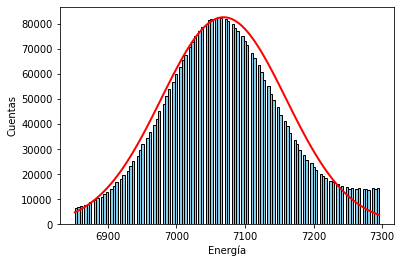

El pico 2 tiene una energia de 7068.785080197843 eV y una altura de  82686.42159224079 cuentas


In [14]:
# Grafico el ajuste
#plt.plot(x, y, 'ko')
plt.hist(pico2['Energia'], weights=pico2['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.plot(x, f([amp2, cen2, wid2], x), color='red', linewidth=2)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
plt.show()

print("El pico 2 tiene una energia de", cen2, "eV y una altura de ", amp2, "cuentas")

## Pico 3

(array([ 4024.,     0.,  4759.,     0.,  4812.,     0.,  5435.,     0.,
         6072.,     0.,  7051.,     0.,  7723.,     0.,  8881.,     0.,
        10086.,     0., 11346.,     0., 12560.,     0., 14024.,     0.,
        15399.,     0., 17310.,     0., 19037.,     0., 20817.,     0.,
            0., 23045.,     0., 24680.,     0., 26758.,     0., 29109.,
            0., 31095.,     0., 32788.,     0., 34868.,     0., 37323.,
            0., 38782.,     0., 39903.,     0., 41765.,     0., 42585.,
            0., 43365.,     0., 45125.,     0., 45125.,     0.,     0.,
        45230.,     0., 45560.,     0., 44942.,     0., 44121.,     0.,
        43708.,     0., 42509.,     0., 41356.,     0., 39730.,     0.,
        38247.,     0., 36831.,     0., 35006.,     0., 33240.,     0.,
        30725.,     0., 29163.,     0., 26878.,     0., 24999.,     0.,
            0., 22683.,     0., 21186.,     0., 19676.,     0., 17588.,
            0., 15932.,     0., 14249.,     0., 12869.,     0., 

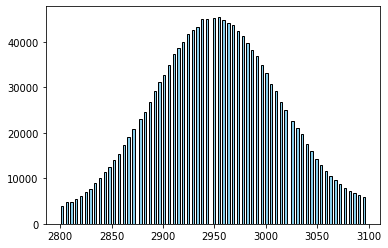

In [15]:
#pathfinder(2800, 3100,50, div=1000)
pico3 = recorte(2800, 3100)
plt.hist(pico3['Energia'], weights=pico3['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)

In [16]:
# Ajusto el pico 3 usando ODR y la funcion gausseana
x = pico3['Energia']
y = pico3['Cuentas']

mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, gauss, beta0=[45000, 2950., 18000.], maxit=10000)
myoutput = myodr.run()
myoutput.pprint()
amp3 = myoutput.beta[0]
cen3 = myoutput.beta[1]
err_cen3 = myoutput.sd_beta[1]
wid3 = myoutput.beta[2]

amp, cen, wid

Beta: [45560.75358071  2951.36173994  8609.06852754]
Beta Std Error: [18.89726208  0.49015556 96.59237044]
Beta Covariance: [[ 2.40209025e+01 -7.91801050e-02 -5.68646252e+00]
 [-7.91801050e-02  1.61606718e-02  1.18137930e-01]
 [-5.68646252e+00  1.18137930e-01  6.27591707e+02]]
Residual Variance: 14.866490296351765
Inverse Condition #: 0.03372276707581336
Reason(s) for Halting:
  Sum of squares convergence


(525014.6602961456, 6403.761443479195, 12135.072740880712)

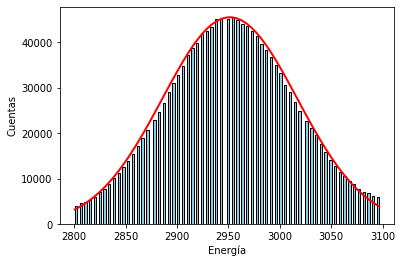

El pico 3 tiene una energia de 2951.3617399402733 eV y una altura de  45560.753580710036 cuentas


In [17]:
# Grafico el ajuste
#plt.plot(x, y, 'ko')
plt.hist(pico3['Energia'], weights=pico3['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.plot(x, f([amp3, cen3, wid3], x), color='red', linewidth=2)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
plt.show()

print("El pico 3 tiene una energia de", cen3, "eV y una altura de ", amp3, "cuentas")

## Pico 4

(array([ 2191.,  2480.,     0.,  2666.,  2863.,     0.,  3202.,  3575.,
            0.,  3941.,  4329.,     0.,  4836.,  5391.,     0.,  5938.,
         6672.,     0.,  7405.,     0.,  8202.,  9257.,     0., 10151.,
        11303.,     0., 12570., 13871.,     0., 15185., 16533.,     0.,
        18376., 19516.,     0., 21268.,     0., 22700., 24577.,     0.,
        26627., 28018.,     0., 29814., 31376.,     0., 32457., 34419.,
            0., 35743., 36602.,     0., 37603., 38937.,     0., 39768.,
            0., 39675., 39907.,     0., 39880., 39941.,     0., 39093.,
        38811.,     0., 37798., 36269.,     0., 35812., 34225.,     0.,
        32795.,     0., 31383., 29506.,     0., 28253., 26123.,     0.,
        24480., 22520.,     0., 20628., 19243.,     0., 17746., 15806.,
            0., 14550., 12753.,     0., 11613.,     0., 10225.,  9152.,
            0.,  8116.,  7039.,     0.,  6440.,  5535.,     0.,  4825.,
         4258.,     0.,  3921.,  3317.,     0.,  2982.,     0., 

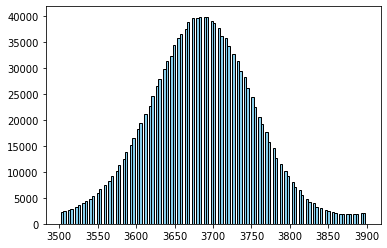

In [18]:
#pathfinder(3500, 3900, 100, div=1000)
pico4 = recorte(3500, 3900)
plt.hist(pico4['Energia'], weights=pico4['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)

In [19]:
# Ajusto el pico 4 usando ODR y la funcion gausseana
x = pico4['Energia']
y = pico4['Cuentas']

mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, gauss, beta0=[40000, 3700., 9000.], maxit=10000)
myoutput = myodr.run()
myoutput.pprint()
amp4 = myoutput.beta[0]
cen4 = myoutput.beta[1]
err_cen4 = myoutput.sd_beta[1]
wid4 = myoutput.beta[2]

amp, cen, wid

Beta: [39950.95999014  3686.01156375 10156.62840012]
Beta Std Error: [ 99.28675263   1.05555379 185.28163317]
Beta Covariance: [[ 1.07111874e+02 -4.69993117e-02 -1.94899375e+01]
 [-4.69993117e-02  1.21064201e-02 -2.48664586e-01]
 [-1.94899375e+01 -2.48664586e-01  3.73009374e+02]]
Residual Variance: 92.0332999399137
Inverse Condition #: 0.01515638646740564
Reason(s) for Halting:
  Sum of squares convergence


(525014.6602961456, 6403.761443479195, 12135.072740880712)

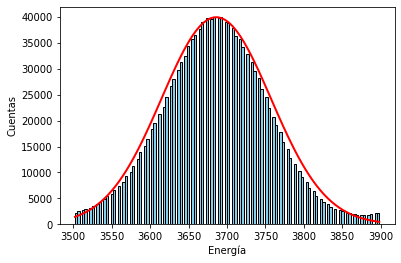

El pico 4 tiene una energia de 3686.011563749046 eV y una altura de  39950.959990142175 cuentas


In [20]:
# Grafigo el ajuste
#plt.plot(x, y, 'ko')
plt.hist(pico4['Energia'], weights=pico4['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.plot(x, f([amp4, cen4, wid4], x), color='red', linewidth=2)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
plt.show()

print("El pico 4 tiene una energia de", cen4, "eV y una altura de ", amp4, "cuentas")

## Pico 5

(array([  898.,   943.,  1035.,     0.,  1182.,  1285.,  1473.,     0.,
         1619.,  1724.,     0.,  2100.,  2336.,  2741.,     0.,  3080.,
         3628.,  4183.,     0.,  4489.,  5306.,     0.,  5990.,  6726.,
         7682.,     0.,  8716.,  9697., 10730.,     0., 12269., 13278.,
            0., 14768., 16205., 17574.,     0., 19252., 20711., 22399.,
            0., 23973., 25434.,     0., 27253., 28605., 30035.,     0.,
        31279., 32580., 33649.,     0., 34606., 35612.,     0., 36044.,
        36707., 36655.,     0., 37262., 36793., 36462.,     0., 36162.,
        35467.,     0., 34679., 33616., 32580.,     0., 31844., 30217.,
        28698.,     0., 27575., 25862.,     0., 24316., 23208., 21449.,
            0., 20034., 18661., 17234.,     0., 15806., 14977.,     0.,
        13275., 12078., 11278.,     0., 10215.,  9301.,  8469.,     0.,
         7772.,  6972.,     0.,  6241.,  5833.,  5268.,     0.,  5054.,
         4442.,  4051.,     0.,  3826.,  3543.,     0.,  3176., 

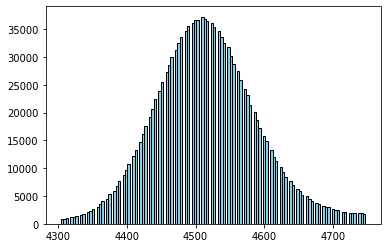

In [21]:
#pathfinder(4300, 4750, 100, div=1000)
pico5 = recorte(4300, 4750)
plt.hist(pico5['Energia'], weights=pico5['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)

In [22]:
# Ajusto el pico 5 usando ODR y la funcion gausseana
x = pico5['Energia']
y = pico5['Cuentas']

mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, gauss, beta0=[37000, 4500., 9000.], maxit=10000)
myoutput = myodr.run()
myoutput.pprint()
amp5 = myoutput.beta[0]
cen5 = myoutput.beta[1]
err_cen5 = myoutput.sd_beta[1]
wid5 = myoutput.beta[2]

amp, cen, wid

Beta: [37262.45315615  4516.05438263 11378.76225838]
Beta Std Error: [ 66.92028984   1.42223319 250.11436276]
Beta Covariance: [[ 2.38850062e+01  4.50673933e-02 -5.56595709e+00]
 [ 4.50673933e-02  1.07882587e-02 -1.50629902e-01]
 [-5.56595709e+00 -1.50629902e-01  3.33646824e+02]]
Residual Variance: 187.49524909819849
Inverse Condition #: 0.0065884732440919195
Reason(s) for Halting:
  Sum of squares convergence


(525014.6602961456, 6403.761443479195, 12135.072740880712)

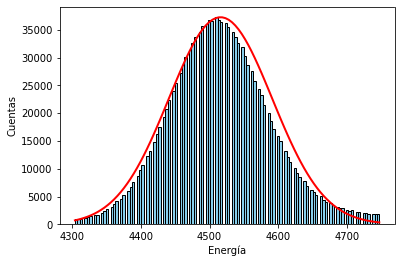

El pico 5 tiene una energia de ( 4516.054382630058 +- 1.4222331926694407 keV y una altura de  525014.6602961456 cuentas


In [23]:
# Grafico el ajuste
#plt.plot(x, y, 'ko')
plt.hist(pico5['Energia'], weights=pico5['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.plot(x, f([amp5, cen5, wid5], x), color='red', linewidth=2)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
plt.show()

print("El pico 5 tiene una energia de (", cen5, "+-", myoutput.sd_beta[1] ,"keV y una altura de ", amp, "cuentas")

## Pico 6

(array([ 1708.,  1812.,     0.,  1927.,  1984.,     0.,  2258.,  2346.,
            0.,  2626.,  2924.,     0.,  3158.,  3541.,     0.,  3799.,
         4170.,     0.,  4756.,     0.,  5342.,  5899.,     0.,  6256.,
         6964.,     0.,  7636.,  8270.,     0.,  9188., 10183.,     0.,
        11170., 12148.,     0., 13110.,     0., 14101., 15169.,     0.,
        16386., 17428.,     0., 18243., 19666.,     0., 20404., 21515.,
            0., 22627., 23205.,     0., 24409., 24836.,     0., 25461.,
            0., 26566., 27069.,     0., 27043., 27909.,     0., 27890.,
        27942.,     0., 27705., 27481.,     0., 27477., 26689.,     0.,
        26295.,     0., 25553., 24753.,     0., 24049., 23417.,     0.,
        22684., 21314.,     0., 20478., 19686.,     0., 18345., 17158.,
            0., 16681., 15278.,     0., 14536.,     0., 13359., 12569.,
            0., 11655., 10959.,     0., 10099.,  9380.,     0.,  8758.,
         8043.,     0.,  7447.,  6956.,     0.,  6507.,     0., 

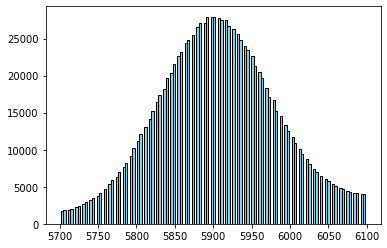

In [24]:
#pathfinder(5700, 6100, 50, div=1000)
pico6 = recorte(5700, 6100)
plt.hist(pico6['Energia'], weights=pico6['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)

In [25]:
# Ajusto el pico 6 usando ODR y la funcion gausseana
x = pico6['Energia']
y = pico6['Cuentas']

mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, gauss, beta0=[26000, 5900., 9000.], maxit=10000)
myoutput = myodr.run()
myoutput.pprint()
amp6 = myoutput.beta[0]
cen6 = myoutput.beta[1]
err_cen6 = myoutput.sd_beta[1]
wid6 = myoutput.beta[2]

Beta: [27939.58283544  5903.87515101 12929.8094274 ]
Beta Std Error: [ 14.84802217   1.39412638 311.62851315]
Beta Covariance: [[ 1.36673731e+00  5.72696728e-03 -5.67119910e-01]
 [ 5.72696728e-03  1.20490311e-02  9.19209265e-02]
 [-5.67119910e-01  9.19209265e-02  6.02035650e+02]]
Residual Variance: 161.30661056601178
Inverse Condition #: 0.00468426188171237
Reason(s) for Halting:
  Sum of squares convergence


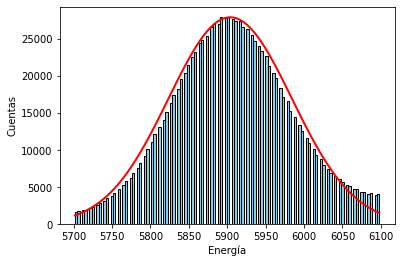

El pico 6 tiene una energia de ( 5903.8751510091115 +- 1.3941263825890473 keV y una altura de  525014.6602961456 cuentas


In [26]:
#Grafico el ajuste
#plt.plot(x, y, 'ko')
plt.hist(pico6['Energia'], weights=pico6['Cuentas'], bins=128, color='skyblue', edgecolor='black', density=False)
plt.plot(x, f([amp6, cen6, wid6], x), color='red', linewidth=2)
plt.xlabel('Energía')
plt.ylabel('Cuentas')
plt.show()

print("El pico 6 tiene una energia de (", cen6, "+-", err_cen6 ,"keV y una altura de ", amp, "cuentas")

# Resumen

In [31]:
print("N° de pico \t Energia (eV) \t\t\t\t Altura")
print("1 - Hierro Ka: \t", cen, "+", err_cen, "\t", amp)
print("2 - Hierro Kb: \t", cen2,"+", err_cen2 ,"\t", amp2)
print("3 - Argón Ka:\t", cen3,"+", err_cen3 ,"\t", amp3)
print("4 - Calcio Ka:\t", cen4,"+", err_cen4 ,"\t", amp4)
print("5 - Titanio Ka:\t", cen5,"+", err_cen5 ,"\t", amp5)
print("6 - Manganeso Ka:\t", cen6,"+", err_cen6 ,"\t", amp6)


N° de pico 	 Energia (eV) 				 Altura
1 - Hierro Ka: 	 6403.761443479195 + 3.521135665075976 	 0.7771183672065594
2 - Hierro Kb: 	 7068.785080197843 + 1.6697093168970154 	 0.12239112885280148
3 - Argón Ka:	 2951.3617399402733 + 0.490155556711837 	 0.06743830431586469
4 - Calcio Ka:	 3686.011563749046 + 1.0555537857157804 	 0.05913477688101388
5 - Titanio Ka:	 4516.054382630058 + 1.4222331926694407 	 0.055155291736970966
6 - Manganeso Ka:	 5903.8751510091115 + 1.3941263825890473 	 0.04135572705962525


In [30]:
# Normalizo las alturas de los amp
ampT = amp + amp2 + amp4  + amp6
amp = amp/ampT
amp2 = amp2/ampT
amp3 = amp3/ampT
amp4 = amp4/ampT
amp5 = amp5/ampT
amp6 = amp6/ampT